# Analiza szeregów czasowych 
## Przetwarzanie wstępne i przeglądanie danych indeksowanych znacznikiem czasu.


Ten przykład pokazuje, jak analizować wzorce ruchu rowerowego na podstawie danych z czujników przy użyciu zbioru  danych rozkładu jazdy do przetwarzania i wstępnego danych ze znacznikiem czasu. Dane pochodzą z czujników na Broadway Street w Cambridge w stanie Massachusetts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
import datetime
import numpy as np

Wgrywanie zestawu danych

Sposób 1

> W lewym panelu wybierz ikonę "Pliki"  następnie nagłówek "Prześlij do pamięci sesji". Wybierz plik zbioru danych na dysku. Uwaga pliki są usuwane przy odświeżaniu runtime'u, więc jeśli w jakiś sposób runtime zawiesi się bez zakończenia zadania, będziesz musiał je ponownie załadować.

Sposób 2

> Prześlij pliki na dysk google. W lewym panelu wybierz ikonę "Pliki"  następnie nagłówek "Podłącz Dysk". Wybierz "Odświerz", następnie "drive" i odszukaj plik na dysku google. Skopiuj ścieżkę i wklej ją do ` = pd.read_csv("")`



In [2]:
# Wczytanie danych
# Plik BicycleCounts.csv
# oraz weatherData.csv
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BicycleCounts.csv")
#pogoda = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherData.csv")


data = pd.read_csv("BicycleCounts.csv")
pogoda = pd.read_csv("weatherData.csv")

In [3]:

# Indeksowanie po czasie
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 
data.set_index('Timestamp', inplace=True)
data

,Day,Total,Westbound,Eastbound
Timestamp,,,,
2015-06-24 00:00:00,Wednesday,13.0,9.0,4.0
2015-06-24 01:00:00,Wednesday,3.0,3.0,0.0
2015-06-24 02:00:00,Wednesday,1.0,1.0,0.0
2015-06-24 03:00:00,Wednesday,1.0,1.0,0.0
2015-06-24 04:00:00,Wednesday,1.0,1.0,0.0
...,...,...,...,...
2016-07-18 20:00:00,Monday,47.0,37.0,10.0
2016-07-18 21:00:00,Monday,30.0,25.0,5.0
2016-07-18 22:30:00,Monday,18.0,12.0,6.0


Sygnatury czasowe  są reprezentowane przez wartości daty i godziny jak w tym przykładzie lub czasu trwania. 

Dane powinny być indeksowane za pomocą znaczników czasu.

In [4]:
# Podstawowe statystyki
data.dropna().describe()

,Total,Westbound,Eastbound
count,9384.000000,9384.000000,9384.000000
mean,49.885976,24.200234,25.685742
std,64.466993,38.987028,44.459819
min,0.000000,0.000000,0.000000
25%,6.000000,3.000000,2.000000
50%,28.000000,12.000000,11.000000
75%,62.000000,27.000000,29.000000
max,398.000000,286.000000,348.000000


In [5]:
#Jaki czas obejmują dane ?
s = data.index[0]
e = data.index[-1]
czas = e-s
czas

Timedelta('390 days 22:00:00')

In [6]:
#Wybierz dzień, godzinę
data.loc['2015-07-04 00:00:00']

Day          Saturday
Total             8.0
Westbound         7.0
Eastbound         1.0
Name: 2015-07-04 00:00:00, dtype: object

In [7]:
# Wybierz tą sama godzinę, przez kolejne trzy dni
print(data.loc['2015-07-04 00:00:00'])
print(data.loc['2015-07-05 00:00:00'])
print(data.loc['2015-07-06 00:00:00'])

Day          Saturday
Total             8.0
Westbound         7.0
Eastbound         1.0
Name: 2015-07-04 00:00:00, dtype: object
Day          Sunday
Total          22.0
Westbound      22.0
Eastbound       0.0
Name: 2015-07-05 00:00:00, dtype: object
Day          Monday
Total           4.0
Westbound       3.0
Eastbound       1.0
Name: 2015-07-06 00:00:00, dtype: object


In [8]:
#Ograniczenie do jednego dnia

lipiec4 = data.loc['2015-07-04'] 
print(lipiec4)

                          Day  Total  Westbound  Eastbound
Timestamp                                                 
2015-07-04 00:00:00  Saturday    8.0        7.0        1.0
2015-07-04 01:00:00  Saturday   13.0       11.0        2.0
2015-07-04 02:00:00  Saturday    4.0        4.0        0.0
2015-07-04 03:00:00  Saturday    1.0        1.0        0.0
2015-07-04 04:00:00  Saturday    0.0        0.0        0.0
2015-07-04 05:00:00  Saturday    1.0        0.0        1.0
2015-07-04 06:00:00  Saturday    8.0        3.0        5.0
2015-07-04 07:00:00  Saturday   16.0        7.0        9.0
2015-07-04 08:00:00  Saturday   15.0        3.0       12.0
2015-07-04 09:00:00  Saturday   21.0        4.0       17.0
2015-07-04 10:00:00  Saturday   38.0       13.0       25.0
2015-07-04 11:00:00  Saturday   33.0       16.0       17.0
2015-07-04 12:00:00  Saturday   46.0       27.0       19.0
2015-07-04 13:00:00  Saturday   48.0       23.0       25.0
2015-07-04 14:00:00  Saturday   33.0       17.0       16

array([[<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Westbound'}>],
       [<AxesSubplot:title={'center':'Eastbound'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 698.976x432 with 0 Axes>

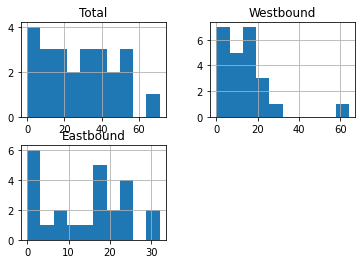

In [9]:
plt.figure(figsize=(6 * 1.618, 6))
lipiec4.hist()

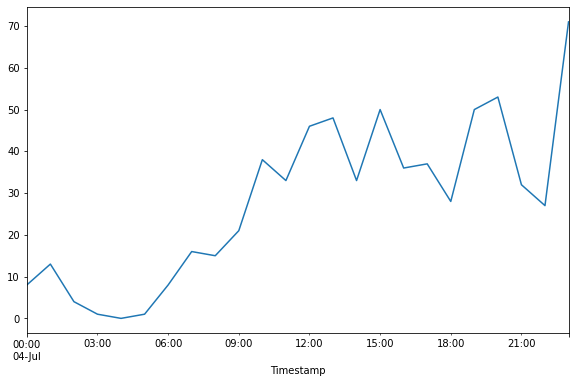

In [10]:
plt.figure(figsize=(6 * 1.618, 6))
lipiec4['Total'].plot()
plt.show()

                          Day  Total  Westbound  Eastbound
Timestamp                                                 
2015-07-04 00:00:00  Saturday    8.0        7.0        1.0
2015-07-04 01:00:00  Saturday   13.0       11.0        2.0
2015-07-04 02:00:00  Saturday    4.0        4.0        0.0
2015-07-04 03:00:00  Saturday    1.0        1.0        0.0
2015-07-04 04:00:00  Saturday    0.0        0.0        0.0
...                       ...    ...        ...        ...
2015-07-11 19:00:00  Saturday   52.0       32.0       20.0
2015-07-11 20:00:00  Saturday   35.0       21.0       14.0
2015-07-11 21:00:00  Saturday   31.0       26.0        5.0
2015-07-11 22:00:00  Saturday   31.0       26.0        5.0
2015-07-11 23:00:00  Saturday   45.0       39.0        6.0

[192 rows x 4 columns]
                          Day  Total  Westbound  Eastbound
Timestamp                                                 
2015-07-04 00:00:00  Saturday    8.0        7.0        1.0
2015-07-04 01:00:00  Saturday   

array([[<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Westbound'}>],
       [<AxesSubplot:title={'center':'Eastbound'}>, <AxesSubplot:>]],
      dtype=object)

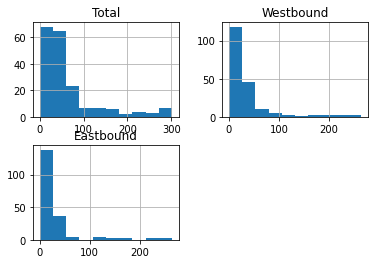

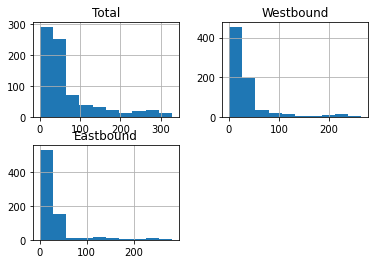

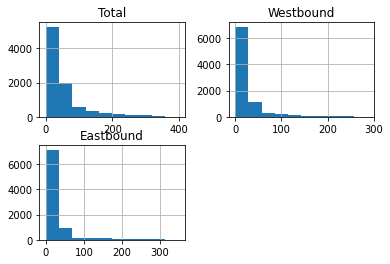

In [11]:
# Proszę wybrać cały tydzień, miesiąc, rok i zrobić wykresy
tydzien = data.loc['2015-07-04':'2015-07-11'] 
print(tydzien)
tydzien.hist()
miesiac = data.loc['2015-07-04':'2015-08-04']
print(miesiac)
miesiac.hist()
rok = data.loc['2015-07-04':'2016-07-04']
print(rok)
rok.hist()

<Figure size 698.976x432 with 0 Axes>

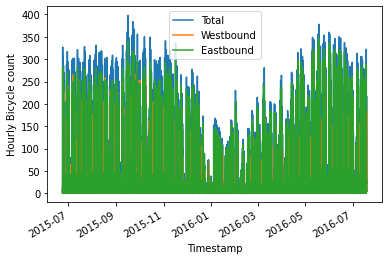

In [12]:
plt.figure(figsize=(6 * 1.618, 6))
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

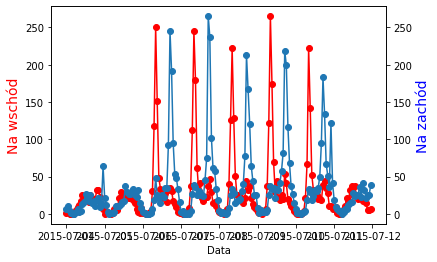

In [13]:
# proszę wybrać cały tydzień, ale rysunek zrobić za pomocą plot i markerów
# na dwóch różnych osiach pokazać dwa kierunki ruchu (yyaxis)
fig, ax  = plt.subplots()
ax.plot(tydzien["Eastbound"], color="red", marker="o")
ax.set_ylabel("Na wschód",color="red",fontsize=14)
ax.set_xlabel("Data")
ax2 = ax.twinx()
ax2.plot(tydzien["Westbound"], marker="o")
ax2.set_ylabel("Na zachód",color="blue",fontsize=14)
plt.show()

# Linia trendu i sezonowość

Dekompozycja szeregu czasowego powinna przebiegać tak:
Wyznaczanie trendu, sezonowaości, oraz to co zostaje jako niewyjaśnione wyżej wymienionymi czynnikami


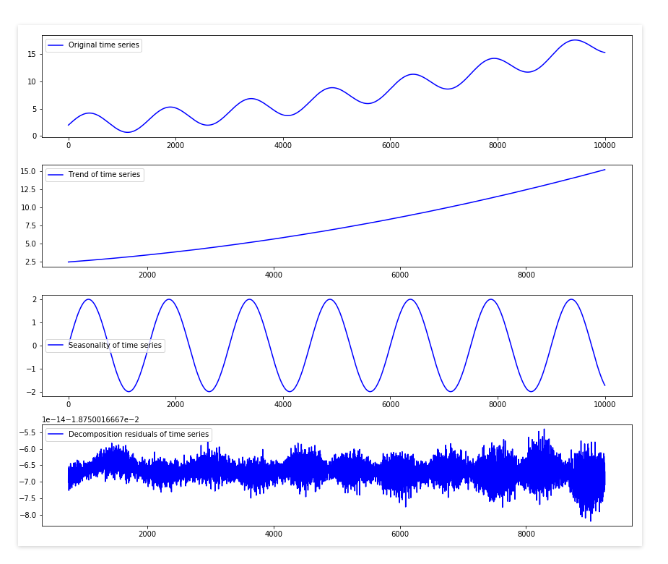

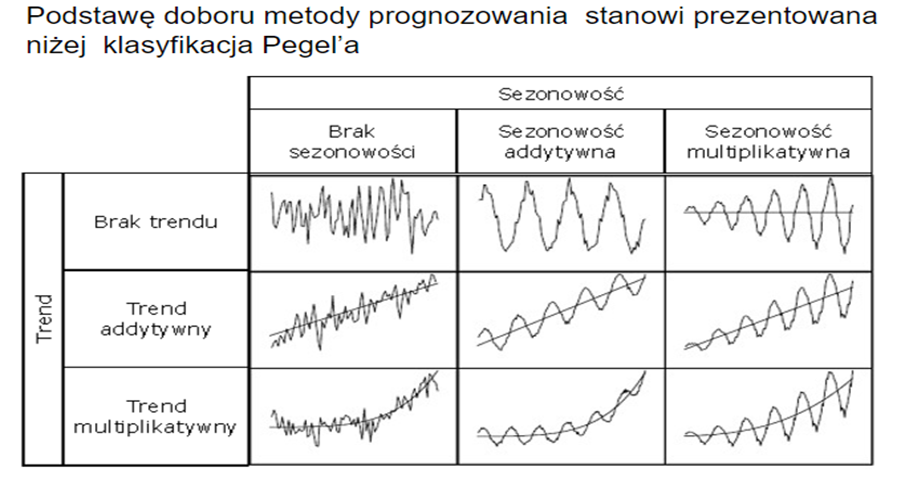

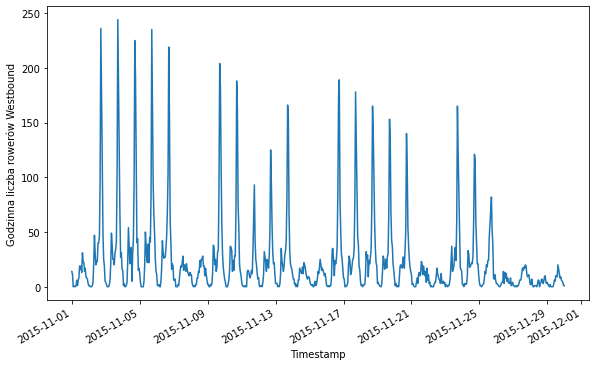

In [14]:
# Analiza dla listopada
start = datetime.datetime(2015, 11, 1)
end = datetime.datetime(2015, 11, 30)
listopad = data[start: end]
plt.figure(figsize=(6 * 1.618, 6))
listopad.Westbound.plot()
plt.ylabel("Godzinna liczba rowerów Westbound")
plt.show()

C:\Users\jakub\AppData\Local\Temp\ipykernel_9496\3204713453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listopad['x'] = x


Text(0, 0.5, 'Westbound')

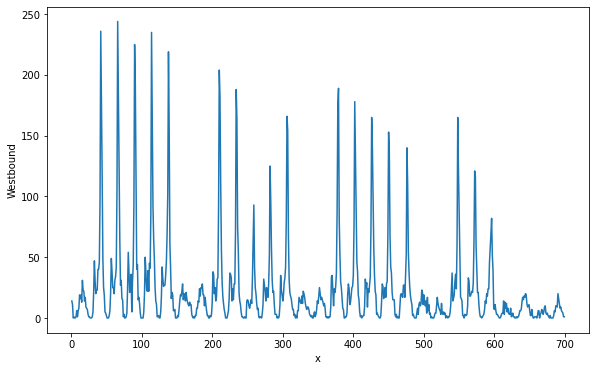

In [15]:
# Dokładamy kolumnę x
x = np.linspace(1, 699, 699)
listopad['x'] = x
# Wykres
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.x, listopad.Westbound)
plt.xlabel('x')
plt.ylabel('Westbound')


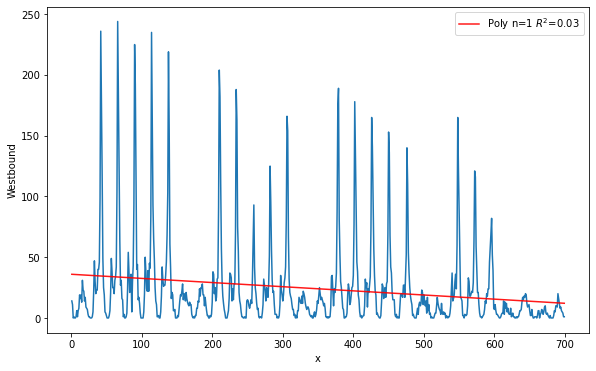

                            OLS Regression Results                            
Dep. Variable:              Westbound   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     23.64
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.44e-06
Time:                        13:37:59   Log-Likelihood:                -3523.8
No. Observations:                 699   AIC:                             7052.
Df Residuals:                     697   BIC:                             7061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9820      2.838     12.678      0.0

In [16]:
# Wielomian 1-go rzędu
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.x, listopad.Westbound)
plt.xlabel('x')
plt.ylabel('Westbound')
poly_1 = smf.ols(formula='Westbound ~ 1 + x', data=listopad).fit()
plt.plot(listopad.x, poly_1.predict(listopad.x), 'r-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)
plt.legend()
plt.show()
print(poly_1.summary())

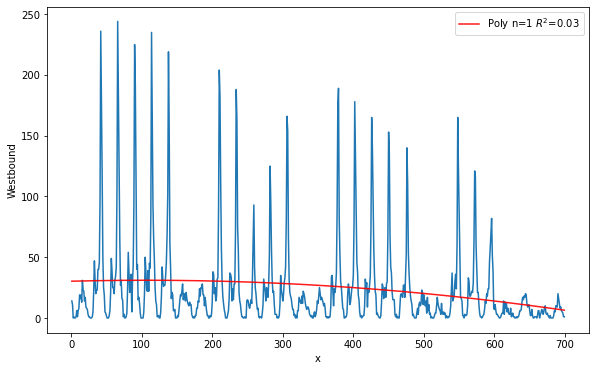

                            OLS Regression Results                            
Dep. Variable:              Westbound   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     13.48
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.80e-06
Time:                        13:38:00   Log-Likelihood:                -3522.2
No. Observations:                 699   AIC:                             7050.
Df Residuals:                     696   BIC:                             7064.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2470      4.258      7.104      0.0

In [17]:
# Wielomian 2-go rzędu
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.x, listopad.Westbound)
plt.xlabel('x')
plt.ylabel('Westbound')
poly_2 = smf.ols(formula='Westbound ~ 1 + x +I(x**2)', data=listopad).fit()
plt.plot(listopad.x, poly_2.predict(listopad), 'r-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)
plt.legend()
plt.show()
print(poly_2.summary())

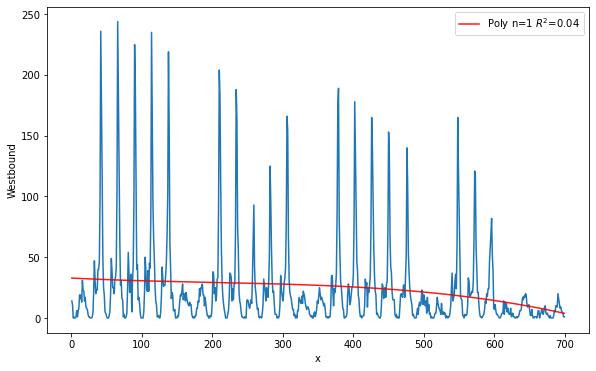

                            OLS Regression Results                            
Dep. Variable:              Westbound   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.143
Date:                Wed, 25 May 2022   Prob (F-statistic):           6.12e-06
Time:                        13:38:01   Log-Likelihood:                -3522.0
No. Observations:                 699   AIC:                             7052.
Df Residuals:                     695   BIC:                             7070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8636      5.694      5.772      0.0

In [18]:
# Proszę sprawdzić wielomiany wyższego rzędu
# formula='Westbound ~ 1 + x + I(x ** 2.0) + I(x ** 3.0)'
# Wielomian 2-go rzędu
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.x, listopad.Westbound)
plt.xlabel('x')
plt.ylabel('Westbound')
poly_3 = smf.ols(formula='Westbound ~ 1 + x +I(x**2) +I(x**3)', data=listopad).fit()
plt.plot(listopad.x, poly_3.predict(listopad), 'r-', label='Poly n=1 $R^2$=%.2f' % poly_3.rsquared, alpha=0.9)
plt.legend()
plt.show()
print(poly_3.summary())

Y = -30.630223889670454 * e^(-0.09469152655975567 * x) + 24.469673253784617


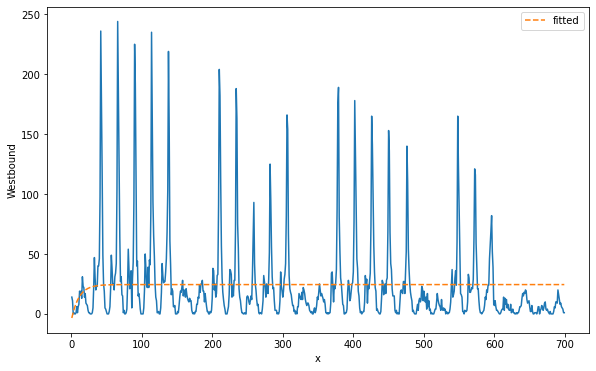

In [19]:
# Dopasowanie funkcją ekspotencjalną 	Y = a*exp(b*x)+c
import scipy.optimize
def monoExp(x, a, b, c):
    #c=0
    return a * np.exp(-b * x) + c
xs = listopad.x
ys = listopad.Westbound

p0 = (40, 0.1, 0) # startujem z wartościami bliskimi spodziewanych
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
print(f"Y = {m} * e^(-{t} * x) + {b}")

plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.x, listopad.Westbound)
plt.xlabel('x')
plt.ylabel('Westbound')
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.legend()

Uwaga !
Parametry weryfikujące  funkcję trendu są podobne, co wynika z tego, że poza godzianami szczytów liczba rowerzystów jest poniżej 50 i jest tych wartości najwięcej: 

(array([617.,  44.,  16.,  16.,   6.]),
 array([  0. ,  48.8,  97.6, 146.4, 195.2, 244. ]),
 <BarContainer object of 5 artists>)

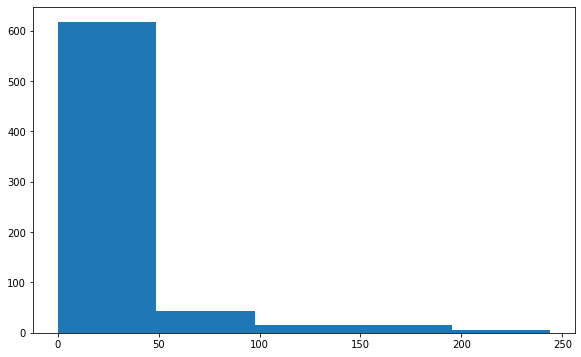

In [20]:
plt.figure(figsize=(6 * 1.618, 6))
plt.hist(listopad.Westbound, bins = 5 )


**odp:** Trend addytywny, tendencja spadkowa, 
sezonowość multiplikatywna związana z godzinami szczytu. 
Dużo wahań losowych związanych (prawdopodobnie) z pogodą.


# Dołóżmy więc pogodę 

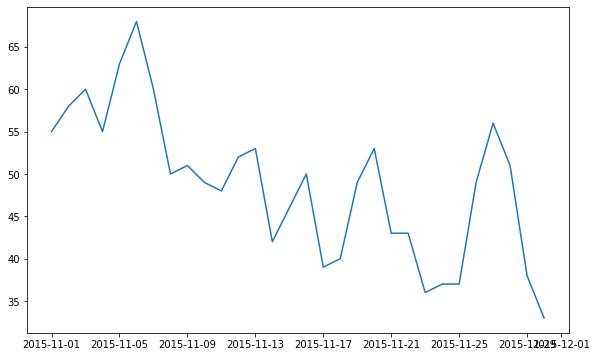

In [21]:
pogoda['Time'] = pd.to_datetime(pogoda['Time']) 
pogoda.set_index('Time', inplace=True)
start = datetime.datetime(2015, 11, 1)
end = datetime.datetime(2015, 11, 30)
pogoda = pogoda.TemperatureF[start:end]
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(pogoda)

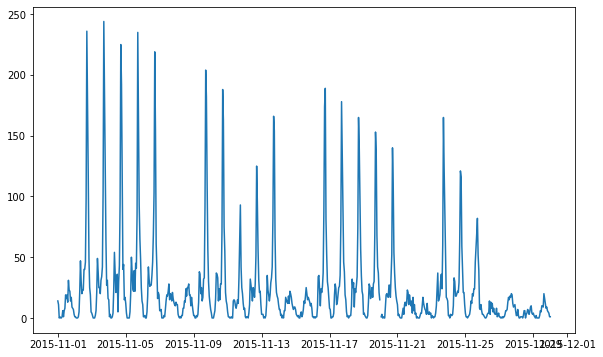

In [22]:
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(listopad.Westbound)

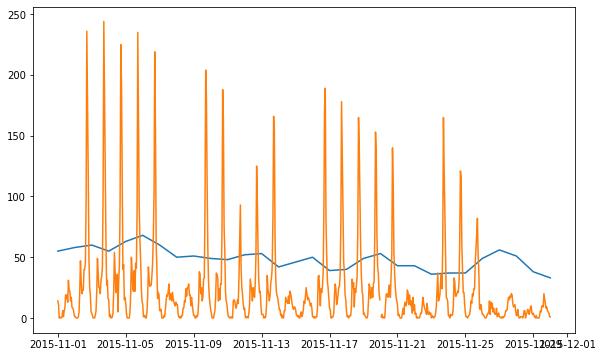

In [23]:
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(pogoda)
plt.plot(listopad.Westbound)

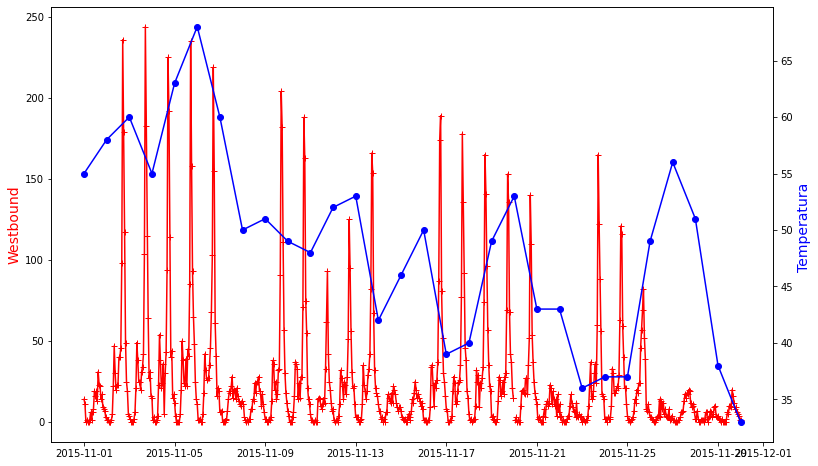

In [24]:
#Narysujmy wykres na niezależnych osiach y

fig,ax = plt.subplots()
#ax.figure(figsize=(6 * 1.618, 6))
ax.plot( listopad.Westbound, color="red", marker="+")
ax.set_ylabel("Westbound",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(pogoda,color="blue",marker="o")
ax2.set_ylabel("Temperatura ",color="blue",fontsize=14)


fig.set_size_inches(8 * 1.618, 8)
plt.show()


Jak widać, nie zawsze zmiana temperatury wpływa na ilość rowerzystów, 
pewnie ma tu znaczenie deszcz, ale jak to zaznaczyć ( kolorami ? gwiazkami ?).

In [25]:
# Proszę zrobić analizę dla jednego miesiąca letniego
start = datetime.datetime(2018,6,1)
stop = datetime.datetime(2018,7,1)

#Średnie ruchome

<AxesSubplot:xlabel='Timestamp'>

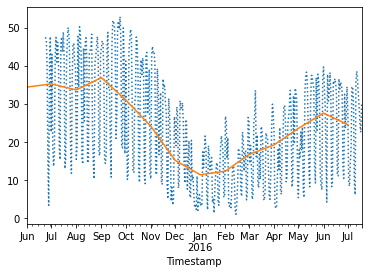

In [26]:
# Proszę wyliczyć dzienne, miesięczne, kwartalne średnie 
#i narysować na jednym wykresie dla każdego z kierunków ruchu osobno

data['Westbound'].resample('D').mean().plot(style=':')
data['Westbound'].resample('M').mean().plot(style='-')






